In [1]:
import datetime
from langchain.agents import AgentExecutor
from langchain.agents.structured_chat.base import StructuredChatAgent
from langchain.prompts import PromptTemplate
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL
from mdagent.utils import _make_llm

In [2]:
prompt = "Write me a code to run simulation of fibronectin."
model = "gpt-4o-2024-08-06"

In [3]:
# Parameters
prompt = "Download the PDB file for 1XQ8, and then save the visualization for it."


In [4]:
llm = _make_llm(model, temp=0.1, streaming=True)

python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)
tools = [repl_tool]

structured_prompt = PromptTemplate(
    input_variables=["input"],
    template="""
    You are an expert molecular dynamics scientist, and your 
    task is to respond to the question or 
    solve the problem in its entirety to the best of your ability. 
    If any part of the task requires you to perform an action that 
    you are not capable of completing, please write a runnable 
    Python script for that step and run it. For literature papers, 
    use and process papers from the `paper_collection` folder. 
    For .pdb files, download them from the RSCB website using `requests`. 
    To preprocess PDB files, you will use PDBFixer. 
    To get information about proteins, retrieve data from the UniProt database. 
    For anything related to simulations, you will use OpenMM, 
    and for anything related to analyses, you will use MDTraj. 

    You can only respond with a single complete
    'Thought, Action, Action Input' format
    OR a single 'Final Answer' format.

    Complete format:
    Thought: (reflect on your progress and decide what to do next)
    Action:
    ```
    {{
        "action": (the action name, it should be the name of a tool),
        "action_input": (the input string for the action)
    }}
    '''

    OR

    Final Answer: (the final response to the original input
    question, once all steps are complete)

    You are required to use the tools provided,
    using the most specific tool
    available for each action.
    Your final answer should contain all information
    necessary to answer the question and its subquestions.
    Before you finish, reflect on your progress and make
    sure you have addressed the question in its entirety.

    Here is the input:
    Question: {input} """,
)

agent = StructuredChatAgent.from_llm_and_tools(
    llm=llm, tools=tools
)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)


In [5]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",llm.model_name,"\nTemperature: ",llm.temperature)

date: 2024-10-17
time: 23:49:53
LLM:  gpt-4o-2024-08-06 
Temperature:  0.1




> Entering new AgentExecutor chain...


Thought

:

 To

 download

 the

 P

DB

 file

 for

1

X

Q

8

,

 I

 will

 use

 the

 `

requests

`

 library

 to

 fetch

 the

 file

 from

 the

 R

CS

B

 P

DB

 website

.

 After

 downloading

,

 I

 will

 visualize

 the

 structure

 using

 a

 suitable

 library

 and

 save

 the

 visualization

.

 Let's

 start

 by

 downloading

 the

 P

DB

 file

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 requests

\n

\n

#

 Download

 the

 P

DB

 file

 for

1

X

Q

8

\n

p

db

_id

 =

 '

1

X

Q

8

'\

n

url

 =

 f

'https

://

files

.rc

sb

.org

/download

/{

p

db

_id

}.

p

db

'\

n

response

 =

 requests

.get

(url

)\

n

\n

#

 Save

 the

 P

DB

 file

\n

with

 open

(f

'{

p

db

_id

}.

p

db

',

 '

wb

')

 as

 file

:\

n

 file

.write

(response

.content

)\

n

\n

#

 Check

 if

 the

 file

 is

 downloaded

\n

import

 os

\n

os

.path

.exists

(f

'{

p

db

_id

}.

p

db

')

"


}


```

Python REPL can execute arbitrary code. Use with caution.


Thought: To download the PDB file for 1XQ8, I will use the `requests` library to fetch the file from the RCSB PDB website. After downloading, I will visualize the structure using a suitable library and save the visualization. Let's start by downloading the PDB file.

Action:
```json
{
  "action": "python_repl",
  "action_input": "import requests\n\n# Download the PDB file for 1XQ8\npdb_id = '1XQ8'\nurl = f'https://files.rcsb.org/download/{pdb_id}.pdb'\nresponse = requests.get(url)\n\n# Save the PDB file\nwith open(f'{pdb_id}.pdb', 'wb') as file:\n    file.write(response.content)\n\n# Check if the file is downloaded\nimport os\nos.path.exists(f'{pdb_id}.pdb')"
}
```


Observation: 
Thought:

To

 visualize

 the

 P

DB

 file

,

 I

 will

 use

 a

 molecular

 visualization

 library

 such

 as

 Py

M

OL

 or

 N

GL

View

.

 Since

 I

 need

 to

 save

 the

 visualization

,

 I

 will

 use

 Py

M

OL

 to

 generate

 an

 image

 of

 the

 structure

.

 Let's

 proceed

 with

 visual

izing

 and

 saving

 the

 structure

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 pym

ol

\n

from

 pym

ol

 import

 cmd

\n

\n

#

 Initialize

 Py

M

OL

\n

p

ym

ol

.finish

_launch

ing

(['

p

ym

ol

',

 '-

cq

'])

\

n

\n

#

 Load

 the

 P

DB

 file

\n

cmd

.load

('

1

X

Q

8

.p

db

')

\

n

\n

#

 Set

 the

 visualization

 style

\n

cmd

.show

('

cart

oon

')

\

n

\n

#

 Save

 the

 visualization

 as

 an

 image

\n

cmd

.png

('

1

X

Q

8

_visual

ization

.png

')

\

n

\n

#

 Check

 if

 the

 image

 is

 saved

\n

import

 os

\n

os

.path

.exists

('

1

X

Q

8

_visual

ization

.png

')

"


}


``

`


To visualize the PDB file, I will use a molecular visualization library such as PyMOL or NGLView. Since I need to save the visualization, I will use PyMOL to generate an image of the structure. Let's proceed with visualizing and saving the structure.

Action:
```json
{
  "action": "python_repl",
  "action_input": "import pymol\nfrom pymol import cmd\n\n# Initialize PyMOL\npymol.finish_launching(['pymol', '-cq'])\n\n# Load the PDB file\ncmd.load('1XQ8.pdb')\n\n# Set the visualization style\ncmd.show('cartoon')\n\n# Save the visualization as an image\ncmd.png('1XQ8_visualization.png')\n\n# Check if the image is saved\nimport os\nos.path.exists('1XQ8_visualization.png')"
}
```

Observation: ModuleNotFoundError("No module named 'pymol'")
Thought:

Py

M

OL

 is

 not

 installed

 in

 the

 current

 environment

.

 I

 will

 use

 an

 alternative

 library

,

 N

GL

View

,

 to

 visualize

 the

 P

DB

 file

 and

 save

 the

 visualization

.

 N

GL

View

 can

 be

 used

 in

 a

 J

upyter

 notebook

 environment

 to

 create

 visual

izations

,

 but

 saving

 them

 as

 static

 images

 requires

 a

 different

 approach

.

 I

 will

 use

 Mat

plotlib

 to

 save

 a

 simple

 visualization

 of

 the

 protein

 structure

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 ng

l

view

 as

 nv

\n

import

 matplotlib

.pyplot

 as

 plt

\n

from

 mpl

_tool

kits

.m

plot

3

d

 import

 Ax

es

3

D

\n

import

 md

traj

 as

 md

\n

\n

#

 Load

 the

 P

DB

 file

 using

 MDT

raj

\n

traj

 =

 md

.load

('

1

X

Q

8

.p

db

')

\

n

\n

#

 Create

 a

 simple

3

D

 plot

 using

 Mat

plotlib

\n

fig

 =

 plt

.figure

()\

n

ax

 =

 fig

.add

_subplot

(

111

,

 projection

='

3

d

')

\

n

\n

#

 Extract

 the

 coordinates

 of

 the

 alpha

 carb

ons

\n

alpha

_c

arb

ons

 =

 traj

.top

ology

.select

('

name

 CA

')

\

n

coords

 =

 traj

.xyz

[

0

,

 alpha

_c

arb

ons

,

 :

]\

n

\n

#

 Plot

 the

 alpha

 carb

ons

\n

ax

.scatter

(coords

[:,

0

],

 coords

[:,

1

],

 coords

[:,

2

],

 c

='

b

',

 marker

='

o

')

\

n

\n

#

 Set

 labels

\n

ax

.set

_xlabel

('

X

')

\

n

ax

.set

_ylabel

('

Y

')

\

n

ax

.set

_z

label

('

Z

')

\

n

\n

#

 Save

 the

 plot

\n

plt

.savefig

('

1

X

Q

8

_visual

ization

.png

')

\

n

\n

#

 Check

 if

 the

 image

 is

 saved

\n

import

 os

\n

os

.path

.exists

('

1

X

Q

8

_visual

ization

.png

')

"


}


``

`


PyMOL is not installed in the current environment. I will use an alternative library, NGLView, to visualize the PDB file and save the visualization. NGLView can be used in a Jupyter notebook environment to create visualizations, but saving them as static images requires a different approach. I will use Matplotlib to save a simple visualization of the protein structure.

Action:
```json
{
  "action": "python_repl",
  "action_input": "import nglview as nv\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\nimport mdtraj as md\n\n# Load the PDB file using MDTraj\ntraj = md.load('1XQ8.pdb')\n\n# Create a simple 3D plot using Matplotlib\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n\n# Extract the coordinates of the alpha carbons\nalpha_carbons = traj.topology.select('name CA')\ncoords = traj.xyz[0, alpha_carbons, :]\n\n# Plot the alpha carbons\nax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c='b', marker='o')\n\n# Set labels\nax.set_xlabel('X

/scratch/qcampbe2/myenvs/mdagent/lib/python3.12/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(



Observation: 
Thought:

The

 visualization

 of

 the

 P

DB

 file

 has

 been

 successfully

 saved

 as

 an

 image

 using

 Mat

plotlib

.

 The

 file

 "

1

X

Q

8

_visual

ization

.png

"

 should

 now

 exist

 in

 the

 current

 directory

.

Action

:


```

json

{


 "

action

":

 "

Final

 Answer

",


 "

action

_input

":

 "

The

 P

DB

 file

 for

1

X

Q

8

 has

 been

 downloaded

 and

 a

 visualization

 has

 been

 saved

 as

 '

1

X

Q

8

_visual

ization

.png

'.

"


}


```

The visualization of the PDB file has been successfully saved as an image using Matplotlib. The file "1XQ8_visualization.png" should now exist in the current directory. 

Action:
```json
{
  "action": "Final Answer",
  "action_input": "The PDB file for 1XQ8 has been downloaded and a visualization has been saved as '1XQ8_visualization.png'."
}
```

> Finished chain.


{'input': '\n    You are an expert molecular dynamics scientist, and your \n    task is to respond to the question or \n    solve the problem in its entirety to the best of your ability. \n    If any part of the task requires you to perform an action that \n    you are not capable of completing, please write a runnable \n    Python script for that step and run it. For literature papers, \n    use and process papers from the `paper_collection` folder. \n    For .pdb files, download them from the RSCB website using `requests`. \n    To preprocess PDB files, you will use PDBFixer. \n    To get information about proteins, retrieve data from the UniProt database. \n    For anything related to simulations, you will use OpenMM, \n    and for anything related to analyses, you will use MDTraj. \n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress 

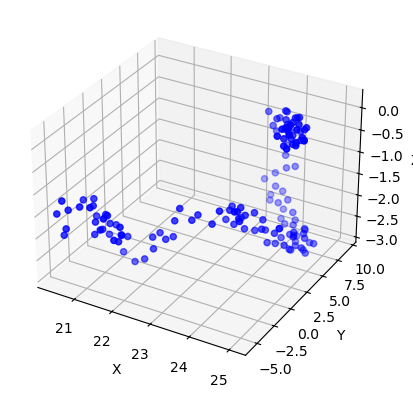

In [6]:
messages = structured_prompt.format(input=prompt)
agent_executor.invoke({"input": messages})

In [7]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2024-10-17
time: 23:50:05


In [1]:
!ls

1XQ8.pdb  1XQ8_visualization.png  exp_17.ipynb


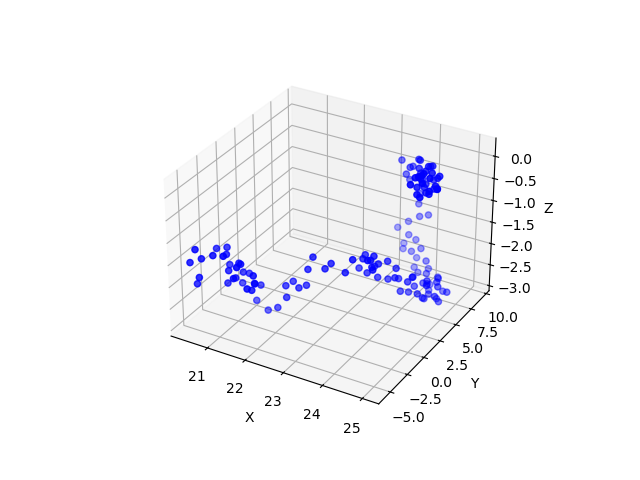

In [2]:
from IPython.display import Image
Image('1XQ8_visualization.png')